In [13]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import subprocess
import json

project_dir = '/curr/kdmarrett/accelerate/'
bin_dir = project_dir + 'bin/'
data_dir = project_dir + 'data/'
save_fig = True
show_fig = True
run_radius = False

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [14]:
radius_json = data_dir + 'test_radius.json'

In [ ]:
# run the radius script from scratch
if run_radius:
    test_cmd = bin_dir + './recut_test --gtest_filter=Radius.* --gtest_output=json:' + radius_json
    tlog = 'test.log'
    subprocess.run(['touch', tlog])
    with open(tlog) as out:
        subprocess.run(test_cmd.split(), stdout=out)

In [15]:
# load
df = pd.read_json(radius_json)

In [17]:
test= df['testsuites'][0]['testsuite'][0]
recut_keys = [i for i in test.keys() if 'Recut' in i]
xy_keys = [i for i in test.keys() if 'XY' in i]

In [18]:
recut_errors = [test[i] for i in recut_keys]
xy_errors = [test[i] for i in xy_keys]
grid_sizes_recut = [int(key.split()[3]) for key in recut_keys]
grid_sizes_xy = [int(key.split()[3]) for key in xy_keys]

recut_errors = [x for _,x in sorted(zip(grid_sizes_recut,recut_errors))]
xy_errors = [x for _,x in sorted(zip(grid_sizes_xy, xy_errors))]
grid_sizes = sorted(grid_sizes_recut)
assert(grid_sizes == sorted(grid_sizes_xy))
radius_sizes = [i/4 for i in grid_sizes]

/curr/kdmarrett/accelerate/data/Calculate_Radius_and_Prune_Accuracy.png


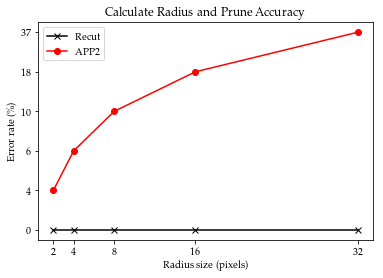

In [10]:
plt.plot(radius_sizes, recut_errors, 'k-x', label=r'Recut')
plt.plot(radius_sizes, xy_errors, 'r-o', label=r'APP2')
plt.xlabel(r'Radius size (pixels)')
plt.xticks(radius_sizes)
plt.ylabel(r'Error rate (\%)')
plt.legend()
title = r'Calculate Radius and Prune Accuracy'
plt.title(title)
fig_output_path = '%s%s.png' % (data_dir, title.replace(' ', '_'))
if save_fig:
    plt.savefig(fig_output_path)
    print(fig_output_path)

In [19]:
bench_json = data_dir + 'bench_radius.json'

In [26]:
data = json.load(open(bench_json))
df = data['benchmarks']
# only collect it once, the benchmark data is inherently ordered
grid_sizes = [int(i['name'].split('/')[-1]) for i in df if 'recut' in i['name']]
names = ['recut', 'xy', 'accurate' ]
real_times = []
time_unit = df[0]['time_unit']
time_unit = 's'
unit_conversion_factor = 1000
for name in names:
    real_times.append( [float(i['real_time']) / unit_conversion_factor for i in df if name in i['name']])
radius_sizes = [i/4 for i in grid_sizes]
real_times

[[0.00046603495082826095,
  0.002936244206581296,
  0.01695476512651186,
  0.1250073079019785,
  0.972874591127038],
 [5.144590590442778e-05,
  0.00042763615196869187,
  0.00940768551081419,
  0.2533106841146946,
  11.256099244579673],
 [8.382119083919747e-05,
  0.0010651246666215186,
  0.025398140773177147,
  0.9139463733881712,
  43.663533098995686]]

/curr/kdmarrett/accelerate/data/Calculate_Radius_Performance_Sequential.png


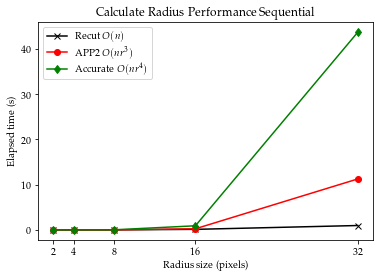

In [31]:

plt.plot(radius_sizes, real_times[0], 'k-x', label=r'Recut $ O(n) $')
plt.plot(radius_sizes, real_times[1], 'r-o', label=r'APP2 $ O(nr^3) $')
plt.plot(radius_sizes, real_times[2], 'g-d', label=r'Accurate $ O(nr^4) $')
#plt.plot(radius_sizes, real_times[2], 'k-', label=r'$O(r)')
plt.xlabel(r'Radius size (pixels)')
plt.xticks(radius_sizes)
plt.ylabel(r'Elapsed time (%s)' % time_unit)
plt.legend()
# plt.yscale('log', basey=10)
#plt.xscale('log', basex=10)
title = r'Calculate Radius Performance Sequential'
plt.title(title)
fig_output_path = '%s%s.png' % (data_dir, title.replace(' ', '_'))
if save_fig:
    plt.savefig(fig_output_path, dpi=300)
    print(fig_output_path)

In [64]:
bench_cmd = bin_dir + './recut_bench --benchmark_filter=radius.* --benchmark_out_format=json:../data/bench_radius.json'
blog = 'bench.log'
subprocess.run(['touch', blog])
with open(blog) as out:
    subprocess.run(bench_cmd.split(), stdout=out)

None


In [ ]:
fig_output_path = '%s%s.png' % (data_dir, title.replace(' ', '_'))
if save_fig:
    plt.savefig(fig_output_path)
    print(fig_output_path)
if show_figs:
    plt.show()
else:
    plt.close()

## Fastmarching Performance

In [2]:
fm_json = data_dir + 'test_detail.json'
# load
df = pd.read_json(fm_json)
# test= df['testsuites'][0]['testsuite'][0]
# recut_keys = [i for i in test.keys() if 'Recut' in i]
# xy_keys = [i for i in test.keys() if 'XY' in i]

In [11]:
perf_tests =df['testsuites'][8]['testsuite'][11:18]

In [12]:
perf_tests

[{'classname': 'RecutPipelineTests/RecutPipelineParameterTests',
  'name': 'ChecksIfFinalVerticesCorrect/11',
  'recut update no IO elapsed (s)': '1',
  'result': 'COMPLETED',
  'sequential fastmarching elapsed (s)': '0',
  'status': 'RUN',
  'time': '32.226s',
  'timestamp': '2020-05-31T17:31:51Z',
  'value_param': '(256, 256, 32, 4, 1, false, true, true)'},
 {'classname': 'RecutPipelineTests/RecutPipelineParameterTests',
  'failures': [{'failure': '/curr/kdmarrett/accelerate/test/recut_test.cpp:1189\nExpected equality of these values:\n  sequential_output_tree.size()\n    Which is: 80528\n  args.output_tree.size()\n    Which is: 80511',
    'type': ''}],
  'name': 'ChecksIfFinalVerticesCorrect/12',
  'recut update no IO elapsed (s)': '0',
  'result': 'COMPLETED',
  'sequential fastmarching elapsed (s)': '0',
  'status': 'RUN',
  'time': '31.739s',
  'timestamp': '2020-05-31T17:32:23Z',
  'value_param': '(256, 256, 128, 4, 1, false, true, true)'},
 {'classname': 'RecutPipelineTests/Re